In [1]:
# modules imports
import numpy as np
from spectral_cube import SpectralCube as sc
import astropy.io.fits as fits
import astropy.io
from astropy.wcs import WCS
import os
import sys
import math
import copy
import time
import numpy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import six

In [2]:
# set default formats
font = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font + ':italic'
plt.rcParams['mathtext.bf'] = font + ':bold'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'


In [20]:
path_12CO = "/Users/r.yamada/science/NGC2023/NGC2023_12CO_Tmb.fits"

hdu_12CO = fits.open(path_12CO)[0]

header = hdu_12CO.header
data = hdu_12CO.data

header["CTYPE3"] = "VELO-LSR"
header["CTYPE1"] = "GLON    "
header["CTYPE2"] = "GLAT    "
header["BUNIT"] = "K       "
header["BMAJ"] = 0.0038888888888888888
#wcs = WCS(path_12CO)
print(header)
hdu_fixed = fits.PrimaryHDU(data,header)


SIMPLE  =                    T / Written by IDL:  Wed May  8 23:06:28 2019      BITPIX  =                  -32                                                  NAXIS   =                    3                                                  NAXIS1  =                  193                                                  NAXIS2  =                  201                                                  NAXIS3  =                  667                                                  OBJECT  = 'ori23             '                                                  TELESCOP= 'NRO45M            '                                                  INSTRUME= 'TMULTH            '                                                  OBSERVER= 'cu128hs           '                                                  DATE-OBS= '2018-01-14        '                                                  BSCALE  =                    1 /                                                BZERO   =                    0 /        

In [21]:
wcs = WCS(hdu_fixed)

In [22]:
cube = sc.read(hdu_fixed)

In [23]:
print(cube)

SpectralCube with shape=(667, 201, 193) and unit=K:
 n_x:    193  type_x: GLON      unit_x: deg    range:   206.661399 deg:  207.061399 deg
 n_y:    201  type_y: GLAT      unit_y: deg    range:   -16.724483 deg:  -16.307817 deg
 n_s:    667  type_s: VOPT      unit_s: m / s  range:   -99850.000 m / s:   99950.000 m / s


In [24]:
from astropy import units as u
mask = cube > 0.88*6*u.K 

In [25]:
cube2 = cube.with_mask(mask)
print(cube2)

SpectralCube with shape=(667, 201, 193) and unit=K:
 n_x:    193  type_x: GLON      unit_x: deg    range:   206.661399 deg:  207.061399 deg
 n_y:    201  type_y: GLAT      unit_y: deg    range:   -16.724483 deg:  -16.307817 deg
 n_s:    667  type_s: VOPT      unit_s: m / s  range:   -99850.000 m / s:   99950.000 m / s


In [26]:
#velocity range 
subcube = cube2.spectral_slab(7.9 * u.km / u.s, 13.3 * u.km / u.s) 
subcube = subcube.with_spectral_unit(u.km / u.s)

In [27]:
print(subcube)

SpectralCube with shape=(19, 201, 193) and unit=K:
 n_x:    193  type_x: GLON      unit_x: deg    range:   206.661399 deg:  207.061399 deg
 n_y:    201  type_y: GLAT      unit_y: deg    range:   -16.724483 deg:  -16.307817 deg
 n_s:     19  type_s: VOPT      unit_s: km / s  range:        7.850 km / s:      13.250 km / s


In [28]:
moment_0 = subcube.moment(order=0)  
moment_1 = subcube.moment(order=1)  
moment_2 = subcube.moment(order=2)   

/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/spectral_cube/_moments.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


In [29]:
def scalebarlength(distance, pc):
    _distance = distance*3.086e+16 #distance pc-m conversion
    _pc = pc*3.086e+16
    angle = numpy.arcsin((1/2)*_pc/_distance)
    return angle

a = scalebarlength(410, 1)

In [30]:
#annotation config
l = [206.8512475766038, 206.8642]
b = [-16.5375049312719, -16.6074]

x_tempo, y_tempo, v = wcs.wcs_world2pix(l, b, 0, 0)

print(x_tempo)

[100.87249891  94.65533568]


/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 24.2956 dpi [aplpy.core]


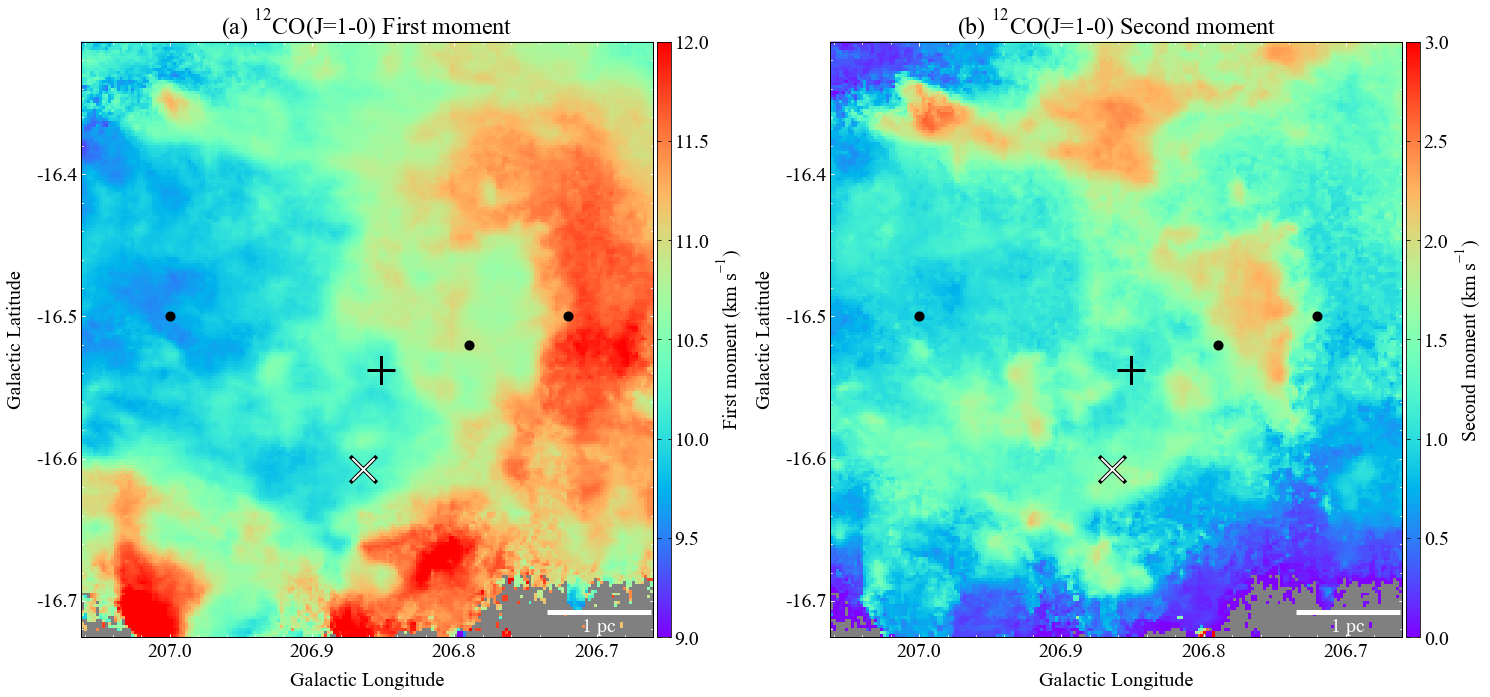

In [14]:
import aplpy  

a = scalebarlength(410, 1)

#moment_0.hdu.header.set('BMAJ    ', '0.0038888888888888888')
#print(moment_0.hdu.header)
fig = plt.figure(figsize=(24, 12))
'''
f = aplpy.FITSFigure(moment_0.hdu, subplot=(1, 2, 1), figure = fig) 
f.show_colorscale(cmap='jet', vmin=0) 
f.add_colorbar()
f.set_nan_color('gray')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.scalebar.set_corner('top right')
f.add_beam()
f.beam.set_corner('top left')
f.beam.set_color('black')
'''
plt.subplots_adjust(wspace=0.27, hspace=0.6)
f = aplpy.FITSFigure(moment_1.hdu, subplot=(1, 2, 1), figure=fig)
f.show_colorscale(cmap='rainbow', vmin=9, vmax=12)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'white',pad=-0.3)
f.scalebar.set_corner('bottom right')
f.scalebar.set_linewidth(5)
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
#f.show_contour(levels=[10.,11.], colors='black')
f.colorbar.set_axis_label_text("First moment (km s$^{-1}$)")
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=700, alpha=1, linewidth=4, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=2 ,zorder=10)
f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=9)
f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.set_title('(a) $^{12}$CO(J=1-0) First moment')
f.scalebar.set_label('1 pc')


f = aplpy.FITSFigure(moment_2.hdu, subplot=(1, 2, 2), figure = fig)  
f.show_colorscale(cmap='rainbow', vmin=0,vmax=3.)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'white',pad=-0.3)
f.colorbar.set_axis_label_text("Second moment (km s$^{-1}$)")
f.scalebar.set_linewidth(5)
f.scalebar.set_corner('bottom right')
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
#f.show_contour(data=moment_1.hdu.data, levels=[10.,11.], colors='black')
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=700, alpha=1, linewidth=4, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=2, zorder=10)
f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=9)
f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.set_title('(b) $^{12}$CO(J=1-0) Second moment')
#f.recenter(206.86666, -16.55, width=0.45, height=0.42)
f.scalebar.set_label('1 pc')
f.savefig('moment_re.eps')  

In [31]:
#define velocity 

v_shresh=1.5

#second momが1.5以上のindexを取得

midmask = moment_2.hdu.data > 1.5
moment_1.hdu.data[midmask]
print(np.min(moment_1.hdu.data[midmask]))
print(np.max(moment_1.hdu.data[midmask]))

data_mom1 = moment_1.hdu.data
data_mom2 = moment_2.hdu.data

data_mom1_max = np.max(moment_1.hdu.data[midmask])
data_mom1_min = np.min(moment_1.hdu.data[midmask])

9.492659624335387
11.735087749041936


/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


In [42]:
flagged_blue_red = numpy.where((data_mom2 < v_shresh) , 1, numpy.nan) # not intermid成分


data_red_blue = data_mom1 * flagged_blue_red

print(data_red_blue.shape)

flagged_blue = np.where((data_red_blue < 10.5),1,np.nan)
flagged_red = np.where((data_red_blue > 10.5),1,np.nan)

data_blue = data_mom1 * flagged_blue
data_red = data_mom1 * flagged_red



print(np.nanmean(data_blue))
print(np.nanmean(data_red))
blue_hdu = fits.PrimaryHDU(data_blue, moment_1.header)
red_hdu = fits.PrimaryHDU(data_red, moment_1.header)



(201, 193)
9.99492632669028
11.219049362275602


/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  
/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute linewidth. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))


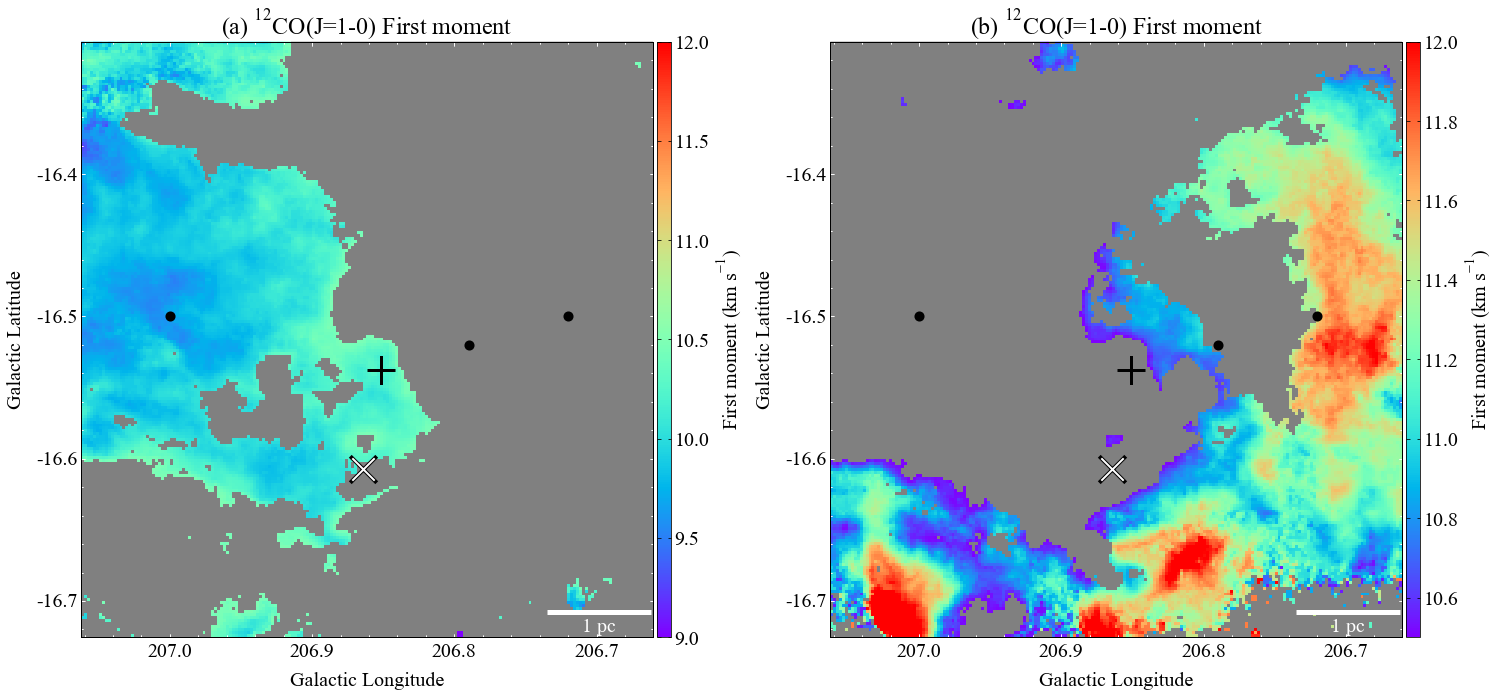

In [45]:
import aplpy  

a = scalebarlength(410, 1)

#moment_0.hdu.header.set('BMAJ    ', '0.0038888888888888888')
#print(moment_0.hdu.header)
fig = plt.figure(figsize=(24, 12))
'''
f = aplpy.FITSFigure(moment_0.hdu, subplot=(1, 2, 1), figure = fig) 
f.show_colorscale(cmap='jet', vmin=0) 
f.add_colorbar()
f.set_nan_color('gray')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.scalebar.set_corner('top right')
f.add_beam()
f.beam.set_corner('top left')
f.beam.set_color('black')
'''
plt.subplots_adjust(wspace=0.27, hspace=0.6)
f = aplpy.FITSFigure(blue_hdu, subplot=(1, 2, 1), figure=fig)
f.show_colorscale(cmap='rainbow', vmin=9, vmax=12)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'white',pad=-0.3)
f.scalebar.set_corner('bottom right')
f.scalebar.set_linewidth(5)
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
#f.show_contour(levels=[10.,11.], colors='black')
f.colorbar.set_axis_label_text("First moment (km s$^{-1}$)")
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=700, alpha=1, linewidth=4, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=2 ,zorder=10)
f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=9)
f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.set_title('(a) $^{12}$CO(J=1-0) First moment')
f.scalebar.set_label('1 pc')


f = aplpy.FITSFigure(red_hdu, subplot=(1, 2, 2), figure = fig)  
f.show_colorscale(cmap='rainbow', vmin=10.5,vmax=12)  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'white',pad=-0.3)
f.colorbar.set_axis_label_text("First moment (km s$^{-1}$)")
f.scalebar.set_linewidth(5)
f.scalebar.set_corner('bottom right')
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
#f.show_contour(data=moment_1.hdu.data, levels=[10.,11.], colors='black')
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=700, alpha=1, linewidth=4, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=2, zorder=10)
f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=9)
f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=200, alpha=1, linewidth=3, zorder=10)
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.set_title('(b) $^{12}$CO(J=1-0) First moment')
#f.recenter(206.86666, -16.55, width=0.45, height=0.42)
f.scalebar.set_label('1 pc') 

/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/spectral_cube/_moments.py:179: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


INFO: Auto-setting vmax to  2.416e+02 [aplpy.core]
INFO: Auto-setting vmax to  2.664e+00 [aplpy.core]


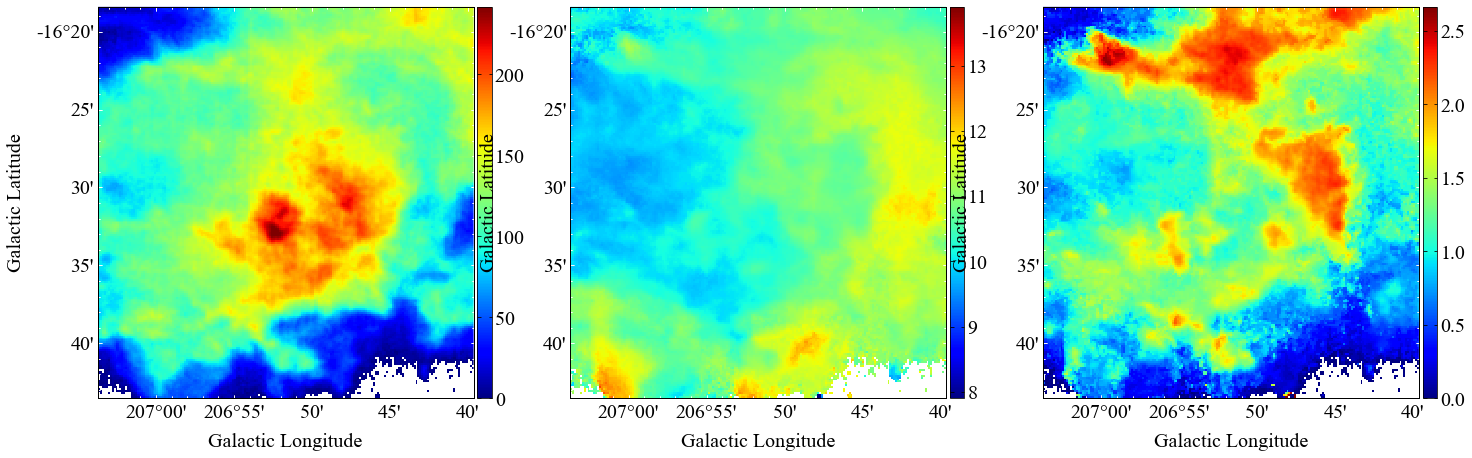

In [17]:
moment_2 = subcube.moment(order=2)
import aplpy  
fig = plt.figure(figsize=(24, 12))
f = aplpy.FITSFigure(moment_0.hdu, subplot=(1, 3, 1), figure = fig) 

f.show_colorscale(cmap='jet', vmin=0) 
f.add_colorbar()

f = aplpy.FITSFigure(moment_1.hdu, subplot=(1, 3, 2), figure = fig)
f.show_colorscale(cmap='jet', vmin=7.9, vmax=13.9)  
f.add_colorbar()

f = aplpy.FITSFigure(moment_2.hdu, subplot=(1, 3, 3), figure = fig)  
f.show_colorscale(cmap='jet', vmin=0)  
f.add_colorbar()
#f.save('moment_0.png')  


In [18]:
def xyv2ch(x, y, v, w): # km/s
    x_ch, y_ch, v_ch = w.wcs_world2pix(x, y, v*1000.0, 0) #230,0=nanndemoOK
    x_ch, y_ch, v_ch = int(round(float(x_ch))),int(round(float(y_ch))),int(round(float(v_ch)))

    return x_ch, y_ch, v_ch

In [19]:
sx,sy,sz=xyv2ch(206.72,-16.36,0,wcs)
ex,ey,ez=xyv2ch(207.06, -16.7,0,wcs)

print(sx,sy,sz)
print(ex,ey,ez)
ncube = subcube[ex:sx,ey:sy,:]

print(ncube)

164 175 333
1 12 333
SpectralCube with shape=(18, 163, 193) and unit=K:
 n_x:    193  type_x: GLON      unit_x: deg    range:   206.661399 deg:  207.061399 deg
 n_y:    163  type_y: GLAT      unit_y: deg    range:   -16.699483 deg:  -16.361983 deg
 n_s:     18  type_s: VOPT      unit_s: km / s  range:        8.150 km / s:      13.250 km / s


In [36]:
#moment_2.hdu.writeto('12CO_mom2_paperformat.fits')

In [37]:
#moment_1.hdu.writeto('12CO_mom1_paperformat.fits')

In [38]:
moment_0 = ncube.moment(order=0)  
moment_1 = ncube.moment(order=1)  
moment_2 = ncube.linewidth_sigma()   

/Users/r.yamada/ymdfits/.venv/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))


INFO: Auto-setting vmin to  9.335e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.232e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.633e+00 [aplpy.core]


INFO: Auto-setting resolution to 24.2956 dpi [aplpy.core]


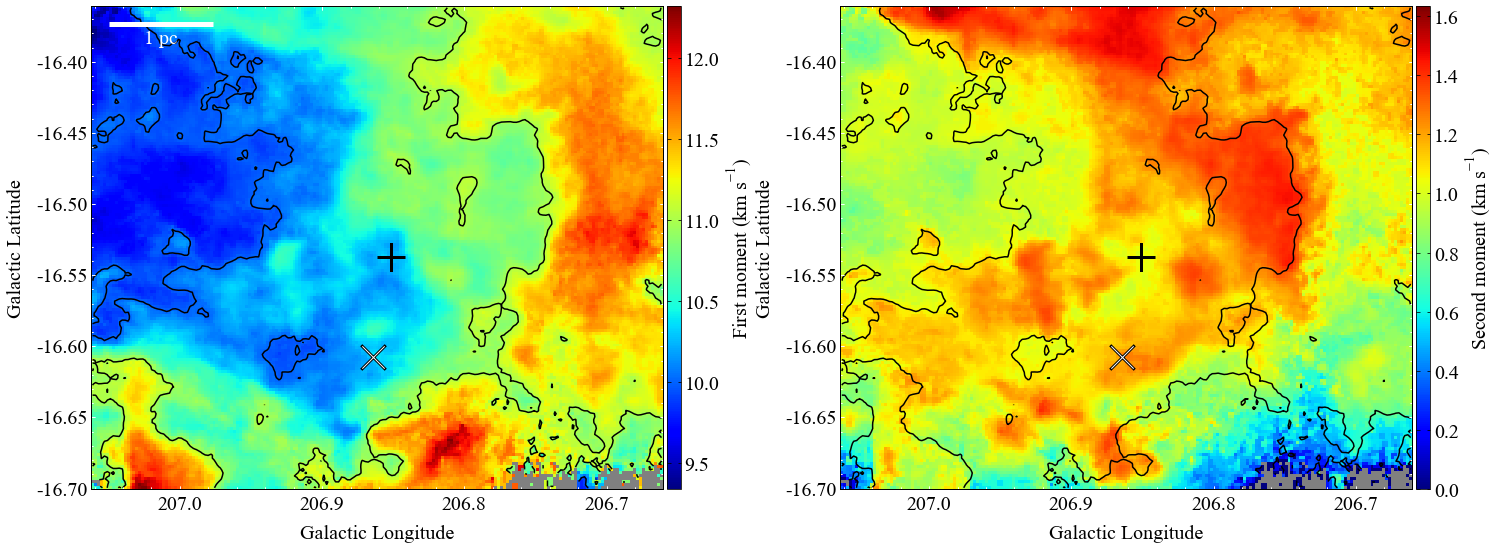

In [39]:

a = scalebarlength(410, 1)

#moment_0.hdu.header.set('BMAJ    ', '0.0038888888888888888')
#print(moment_0.hdu.header)
fig = plt.figure(figsize=(24, 12))
'''
f = aplpy.FITSFigure(moment_0.hdu, subplot=(1, 2, 1), figure = fig) 
f.show_colorscale(cmap='jet', vmin=0) 
f.add_colorbar()
f.set_nan_color('gray')
f.add_scalebar(a*60, '1 pc', color = 'black')
f.scalebar.set_corner('top right')
f.add_beam()
f.beam.set_corner('top left')
f.beam.set_color('black')
'''
plt.subplots_adjust(wspace=0.27, hspace=0.6)
f = aplpy.FITSFigure(moment_1.hdu, subplot=(1, 2, 1), figure=fig)
f.show_colorscale(cmap='jet')  
f.add_colorbar()
f.set_nan_color('grey')
f.add_scalebar(a*60, '1 pc', color = 'white')
f.scalebar.set_corner('top left')
f.scalebar.set_linewidth(5)
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
f.show_contour(levels=[10.,11.], colors='black')
f.colorbar.set_axis_label_text("First moment (km s$^{-1}$)")
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=600, alpha=1, linewidth=3, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=1 ,zorder=10)
#f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=10)
#f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=9)
#f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=10)
f.scalebar.set_label('1 pc')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')

f = aplpy.FITSFigure(moment_2.hdu, subplot=(1, 2, 2), figure = fig)  
f.show_colorscale(cmap='jet', vmin=0)  
f.add_colorbar()
f.set_nan_color('grey')
#f.add_scalebar(a*60, '1 pc', color = 'white')
f.colorbar.set_axis_label_text("Second moment (km s$^{-1}$)")
#f.scalebar.set_linewidth(5)
#f.scalebar.set_corner('top left')
#f.add_beam(borderpad=-1.5)
#f.beam.set_corner('bottom left')
#f.beam.set_color('black')
f.show_contour(data=moment_1.hdu.data, levels=[10.,11.], colors='black')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.show_markers(l[0], b[0], edgecolor='black', facecolor='black', marker='+', s=800, alpha=1, linewidth=3, zorder=10)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='black', marker='x', s=600, alpha=1, linewidth=3, zorder=9)
f.show_markers(l[1], b[1], edgecolor='black', facecolor='white', marker='x', s=500, alpha=1, linewidth=1, zorder=10)
#f.show_markers(207.00, -16.50, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=10)
#f.show_markers(206.72, -16.50, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=9)
#f.show_markers(206.79, -16.52, edgecolor='black', facecolor='black', marker='.', s=800, alpha=1, linewidth=3, zorder=10)
#f.recenter(206.86666, -16.55, width=0.45, height=0.42)
#f.scalebar.set_label('1 pc')
#f.savefig('moment_1_2_2_kimited_13CO.pdf')  